In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
AUSSIE_DATA = pd.read_csv('aussie_clayton_x_x.csv')
AUSSIE_DATA['Date'] = pd.to_datetime(AUSSIE_DATA['Date'], format='%d/%m/%Y')
AUSSIE_DATA['Credit'] = AUSSIE_DATA['Credit'].replace('[\$,]', '', regex=True).astype(float)
AUSSIE_DATA['Debit'] = AUSSIE_DATA['Debit'].replace('[\$,]', '', regex=True).astype(float)
AUSSIE_DATA.fillna(0, inplace=True)
AUSSIE_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 360 non-null    datetime64[ns]
 1   Transaction Details  360 non-null    object        
 2   Debit                360 non-null    float64       
 3   Credit               360 non-null    float64       
 4   Balance              360 non-null    object        
 5   Reference            360 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 17.0+ KB


In [36]:
# Must contain 'Utility' or '515585'
# utility = AUSSIE_DATA[
#     AUSSIE_DATA["Transaction Details"].str.contains("Utility") |
#     AUSSIE_DATA["Transaction Details"].str.contains("515584")
# ].copy()
utility = AUSSIE_DATA[
    AUSSIE_DATA["Transaction Details"].str.contains("Utility")
].copy()
utility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 2 to 355
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 131 non-null    datetime64[ns]
 1   Transaction Details  131 non-null    object        
 2   Debit                131 non-null    float64       
 3   Credit               131 non-null    float64       
 4   Balance              131 non-null    object        
 5   Reference            131 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 7.2+ KB


<class 'pandas.core.series.Series'>
MultiIndex: 52 entries, (2018, 4) to (2022, 11)
Series name: Credit
Non-Null Count  Dtype  
--------------  -----  
52 non-null     float64
dtypes: float64(1)
memory usage: 762.0 bytes


<AxesSubplot: xlabel='Date,Date'>

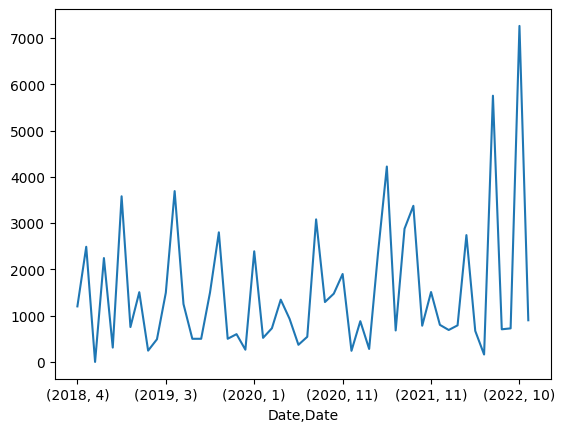

In [37]:
summary_by_month = utility.groupby([utility.Date.dt.year, utility.Date.dt.month])['Credit'].sum()
summary_by_month.info()
summary_by_month.plot()

<class 'pandas.core.series.Series'>
Int64Index: 5 entries, 2018 to 2022
Series name: Credit
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes
2018 12082.0
2019 13833.0
2020 14814.0
2021 16955.6
2022 21193.0


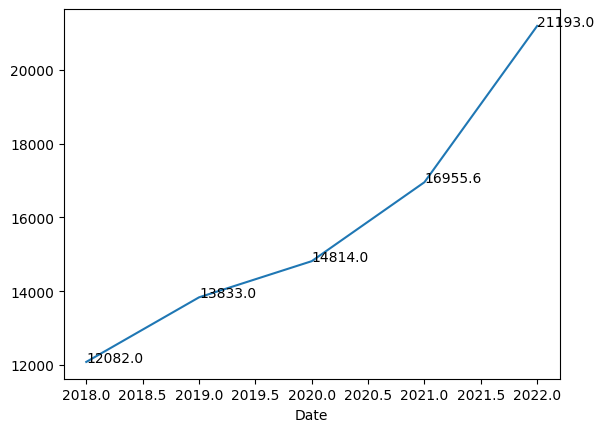

In [38]:

summary_by_year = utility.groupby([utility.Date.dt.year])['Credit'].sum()
summary_by_year.info()
summary_by_year.head()

fig, ax = plt.subplots()
summary_by_year.plot(ax=ax)
for d, v in summary_by_year.items():
    print(d, v)
    ax.annotate(v, (d, v))